In [1]:
import torch
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from scipy.misc import derivative
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 12, 6

### Аналитически решить уравнение на первом слайде

![image.png](HT3.png)

![image.jpg](task.jpg)

### Аналитически посчитать производную от sigmoid


\begin{equation}
     {\sigma(x) = \frac{1}{{1+e^{-x}}}}
\end{equation}

\begin{equation}
     {\sigma(x)' = \frac{e^{-x}}{({e^{-x}+1})^2}}
\end{equation}

In [2]:
def sigmoid_dev(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2) 

def sigmoid(x):
    return 1/(1+(np.exp(-x)))


In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
y_dev_a = sigmoid_dev(x)

y_dev_num = derivative(sigmoid,x)


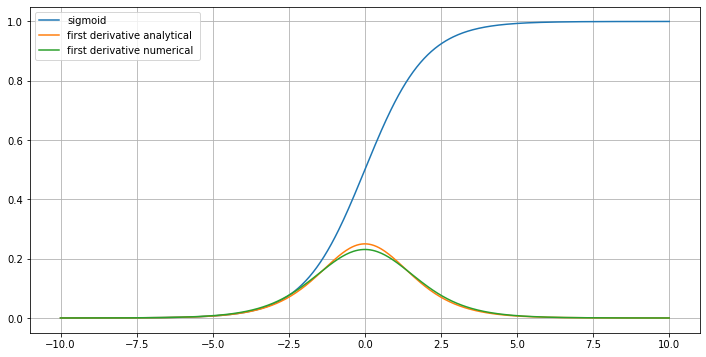

In [4]:
plt.plot(x,y,label = 'sigmoid')
plt.plot(x,y_dev_a, label = 'first derivative analytical ')
plt.plot(x,y_dev_num, label = 'first derivative numerical ')
plt.legend()
plt.grid(True)
plt.show()

### Построить с помощью pytorch гиперплоскость для большого количества данных большой размерности(данные сгенерировать самостоятельно).

В третьем задании предпологается сгенерировать выборку x,y которая представима в виде y = Wx + b. W и b случайно сгенерить. После генерации добавить небольшой шум к x,y. А потом с помощью методов нахождения глобального экстремума для линейной регрессии найти новые W и b


In [5]:

def data_generation (start, end, numb):
    
    '''
    генериркет сет данных в виде y = Wx + b
    и после генерации добавить небольшой шум к y
    
    возвращает данные для расчета
    
    '''
       
    x_in = torch.linspace(start,end,numb)
    y_in = x_in * 2 + 10

    y = y_in + 30 * torch.randn(numb) 
    
    x = torch.reshape(x_in,(numb,1))
    
    x = torch.hstack((torch.ones((x.shape[0],1)),x))
    
    return x, y, x_in, y_in


In [6]:
def matrix_equation (X, y):
    '''
    решает систему уравнений дли нахождения
    коэффициентов а и b
    возвращает матрицу с коэффициентами а и b
    '''
    
    return  torch.linalg.inv(X.T @ X) @ X.T @ y
        

In [7]:
def new_line(ab, x, y):
    '''
    расчет новых значений y для полученых а и b
    
    '''
    line_answers = [ab[0]+ab[1]*x[i] for i in range(len(x))]  
    
    return torch.stack(line_answers)


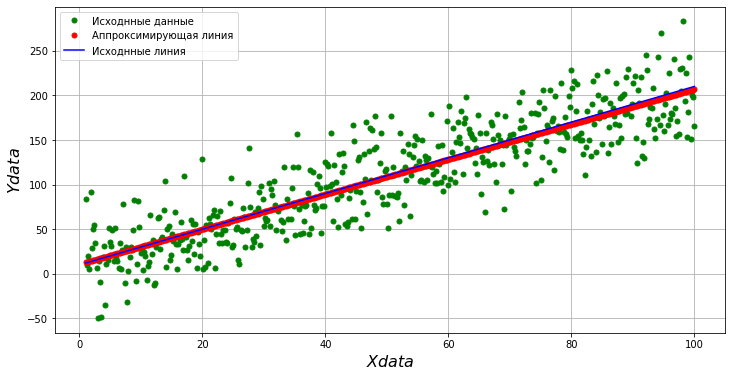

In [8]:
x, y, x_in, y_in = data_generation (1, 100, 500)

ab = matrix_equation(x,y)

y_new =  new_line(ab,x_in,y)

plt.plot(x_in,y,'o',color='green',markersize=5, label= 'Исходнные данные' )
plt.plot(x_in,y_new,'o',color='red',markersize=5, label= 'Аппроксимирующая линия')
plt.plot(x_in,y_in,color='blue',markersize=5, label= 'Исходнные линия')
plt.xlabel('$X data$', size=16)
plt.ylabel('$Y data$', size=16)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import timeit

def dependency (start, end, m, n):
    
    start = timeit.default_timer()   
    
    x, y, x_in, y_in = data_generation(start, end, m)
    
    y2 = torch.rand(m,n)
    
    ab = matrix_equation (x, y2)
       
    stop = timeit.default_timer()
    time = stop - start
    
    return time
    
    

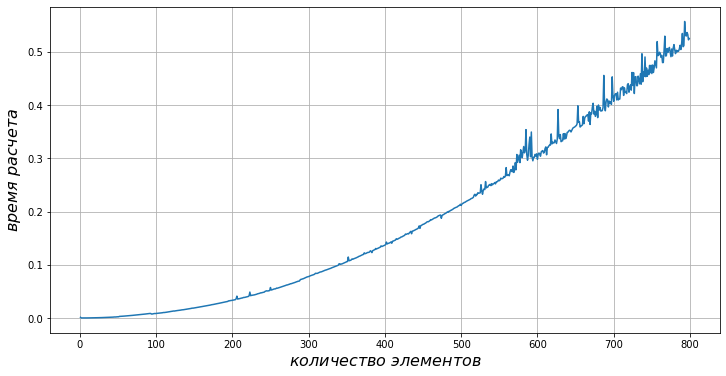

In [11]:
numbers = [n for n in range(1, 800)]

time = [dependency (1, 10000, i*100, i) for i in numbers]

plt.plot(numbers,time)
plt.xlabel('$количество$ $элементов$', size=16)
plt.ylabel('$время$ $расчета$', size=16)
plt.grid(True)
plt.show()
